# Interesting Discoveries in AirBNB

Olivia Xiao
z5478864
Sydney AirBNB dataset sources from Inside AirBNB

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [3]:
%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"] = (10, 5)

In [5]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [55]:
listings_data = pd.read_csv("listings.csv")
filepath = "listings.csv"
print("done")

done


In [10]:
listings_data.shape

(22659, 75)

How many columns and rows

In [7]:
listings_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["host_since"],
    dayfirst=True,
)

In [8]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(listings_data.host_since.min(), date_format_pattern)
latest_date = datetime.strftime(listings_data.host_since.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

'range is: June, 2009 to March, 2023'

this data set includes hosts since 2009 all the way to 2023

In [9]:
matplotlib.rcParams.update(
    saved_style_state)

MadeComfy                           232
David                               221
L'Abode Accommodation Specialist    175
Ken                                 161
Michael                             153
                                   ... 
Brayan                                1
Anne-Lise                             1
Hui                                   1
Miria                                 1
Edin                                  1
Name: host_name, Length: 5397, dtype: int64


<AxesSubplot:>

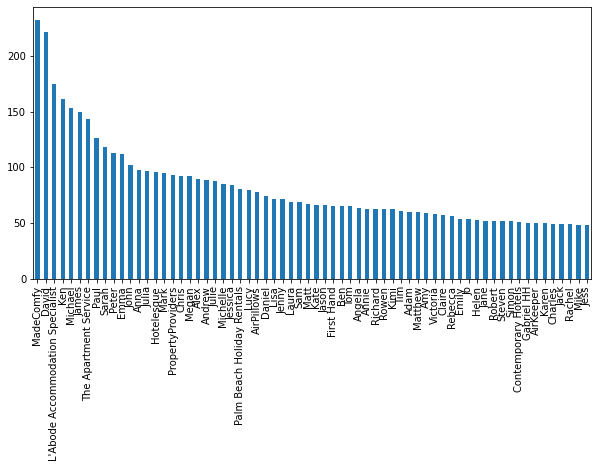

In [11]:
hnc = listings_data["host_name"].value_counts()
print(hnc)

hnc[hnc > 47].plot(kind="bar")

1.0      12599
2.0       3045
3.0       1174
4.0        582
5.0        419
         ...  
71.0         2
155.0        2
373.0        2
88.0         1
58.0         1
Name: host_listings_count, Length: 70, dtype: int64


<AxesSubplot:>

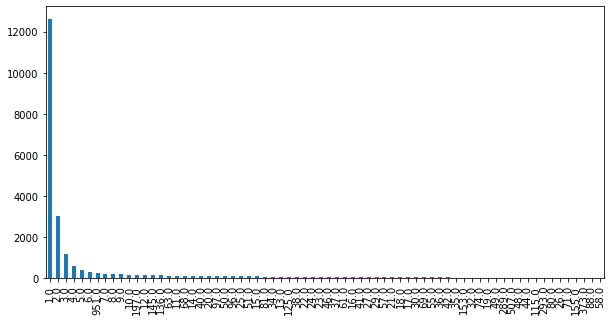

In [12]:
hlcc = listings_data["host_listings_count"].value_counts()
print(hlcc)
hlcc.plot(kind = "bar")

AirBNB management service MadeComfy has the largest amount of listings. In this dataset they have 232 listings in Sydney, all up, they have 951 listings. 

Many hosts have multiple listings: "With time, however, the risk is that the mortgage relief or subsidy of housing costs gained by property owners will drive up property values, making these suburbs unaffordable for the next generation of wishful home owners." (Usyd article)

In [13]:
listings_data["host_listings_count"].value_counts()

1.0      12599
2.0       3045
3.0       1174
4.0        582
5.0        419
         ...  
71.0         2
155.0        2
373.0        2
88.0         1
58.0         1
Name: host_listings_count, Length: 70, dtype: int64

Sydney, Australia                        5554
New South Wales, Australia               1974
Bondi Beach, Australia                    548
Australia                                 445
Manly, Australia                          377
                                         ... 
Prahran, Australia                          1
Saint-Maximin-la-Sainte-Baume, France       1
Tongyeong-si, South Korea                   1
Susegana, Italy                             1
Tanunda, Australia                          1
Name: host_location, Length: 1057, dtype: int64


<AxesSubplot:>

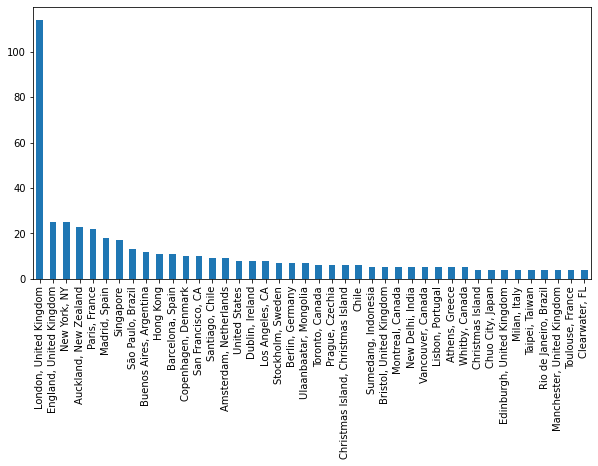

In [14]:
a = listings_data["host_location"].value_counts()
print(a)
df_new = listings_data.loc[(listings_data["host_location"].str.count("Australia") < 1)]
count = df_new["host_location"].value_counts()
count
count[count > 3].plot(kind = "bar")

Majority of hosts are from Sydney Australia, but there are still many overseas hosts. 

/var/folders/h7/2f3zxpvd1q5ddv0m_sjf33vm0000gn/T/ipykernel_54560/2950177536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['host_since'] = pd.to_datetime(df_new['host_since'])


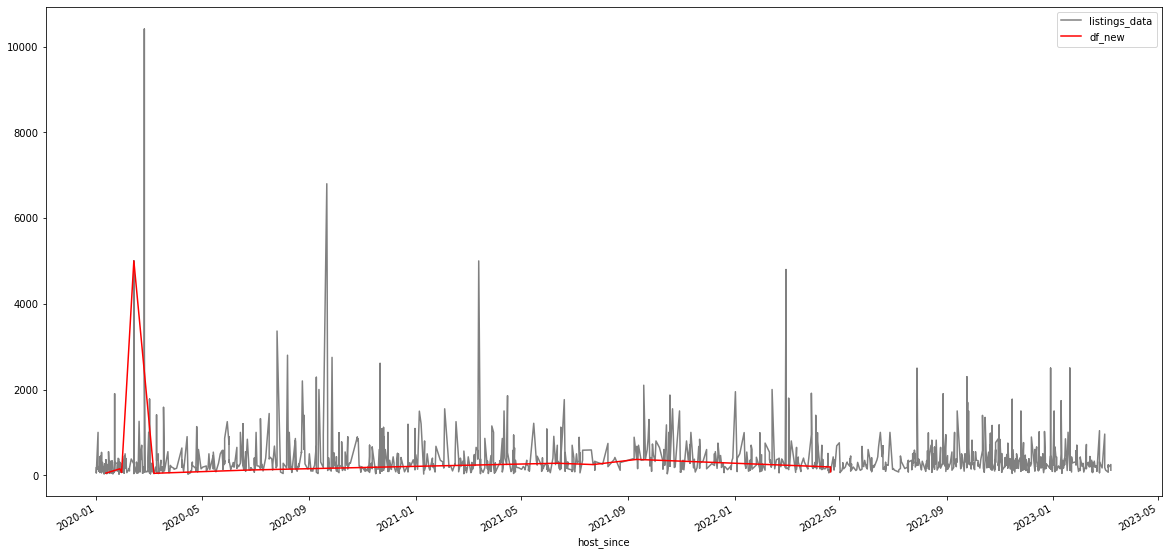

In [40]:
listings_data['host_since'] = pd.to_datetime(listings_data['host_since'])
listings_data_2020_onwards = listings_data.loc[listings_data['host_since'].dt.year >= 2020]

df_new['host_since'] = pd.to_datetime(df_new['host_since'])
df_new_2020_onwards = df_new.loc[df_new['host_since'].dt.year >= 2020]

fig, ax = plt.subplots()
listings_data_2020_onwards.plot(x='host_since', y=' price ', ax=ax, label = 'listings_data', color = 'grey')
df_new_2020_onwards.plot(x='host_since', y=' price ', ax=ax, label='df_new', color='red')
ax.legend()
plt.show()

Far less variations in price for airbnbs with international hosts, prices are generally below $1000 a night  

Note: less data points for listings owned by international hosts. 

<AxesSubplot:>

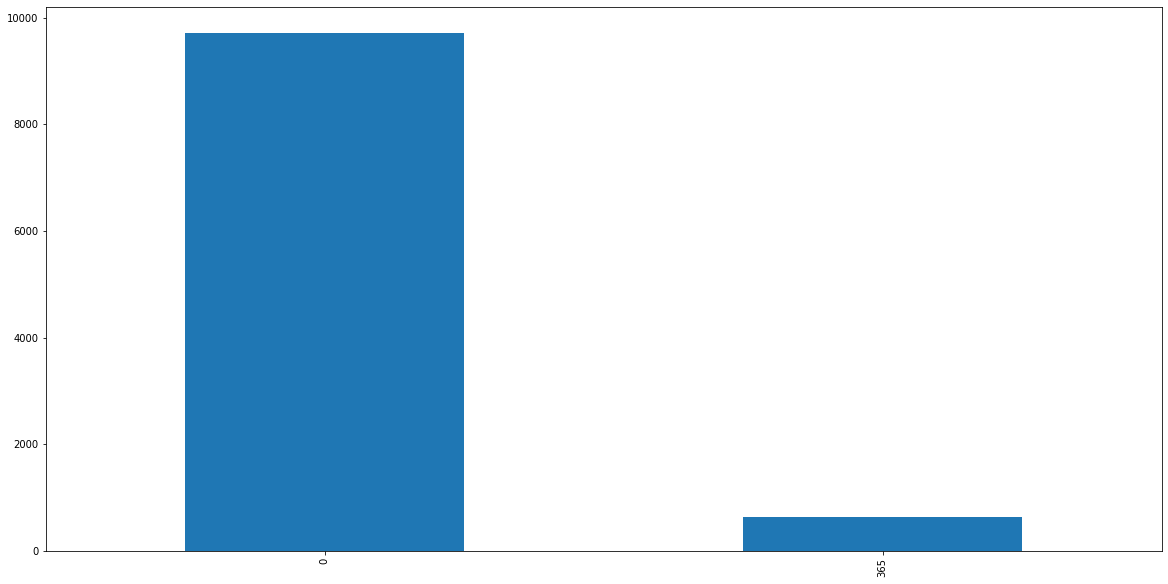

In [54]:
listings_data["availability_365"].value_counts()[listings_data["availability_365"].value_counts() > 500].plot(kind='bar')

9712 listings have 0 availabily throughout the whole year.

<AxesSubplot:>

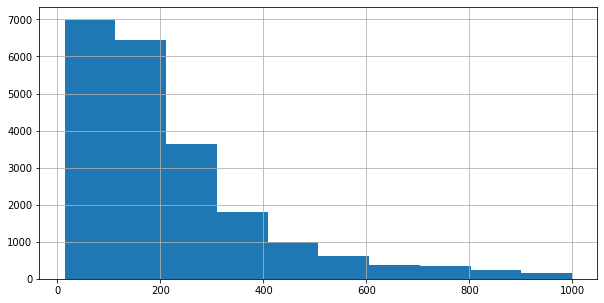

In [18]:
# daily price in aud

listings_data[' price '][listings_data[' price '] < 1000].hist()

Most frequent cost per night is around $100 aud. 

In [19]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


shp_file_name = "/Users/oliviaxiao/1161/data_project/maps/GDA2020/nsw_localities.shp"
zip_file_name = "maps/nsw_locality_polygon_shp.zip"
web_file_path = (
    "https://data.gov.au/data/dataset/"
    "91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
    "5e295412-357c-49a2-98d5-6caf099c2339/download/"
    "nsw_locality_polygon_shp.zip"
)

In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [21]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [22]:
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


In [23]:
listings_data["neighbourhood_cleansed"].value_counts()

# Sydney as in CBD and inner city suburbs. Waverly is like Bondi and stuff

Sydney              5019
Waverley            2898
Randwick            1820
Warringah           1220
Manly               1108
Pittwater           1077
Woollahra            871
North Sydney         823
Marrickville         679
Leichhardt           548
Sutherland Shire     467
Rockdale             449
Ryde                 448
Botany Bay           376
Willoughby           371
Parramatta           369
Auburn               356
Hornsby              348
Mosman               315
Canada Bay           305
The Hills Shire      273
Canterbury           247
Blacktown            241
Ku-Ring-Gai          238
Burwood              229
Lane Cove            189
Ashfield             186
Bankstown            166
Penrith              151
Hurstville           137
Strathfield          136
City Of Kogarah      132
Liverpool            131
Fairfield            106
Campbelltown          75
Holroyd               67
Camden                57
Hunters Hill          31
Name: neighbourhood_cleansed, dtype: int64

Majority of airbnbs are in City of Sydney, Waverly covering Bondi, and beachside suburbs